# In this notebook we will use linear regression to calculate the occupancy rate of the houses, we will use the dataframe boston of the sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
dataset["target"] = boston.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Calcular valor medio esperado
valor_medio_esperado_na_previsao = dataset["target"].mean()
valor_medio_esperado_na_previsao

22.532806324110698

In [5]:
# Simulando o SSE
# SSE é a diferença ao quadrado entre o valor previsto e o valor observado
# considerendo que o valor previsto seja igaul a media, podemos considerar que:
# y = média da variavel target (valores observados)
squared_errors = pd.Series(valor_medio_esperado_na_previsao - dataset['target'])**2
SSE = np.sum(squared_errors)
print("Soma dos quadrados dos erros (SSE): %01.f" %SSE)

Soma dos quadrados dos erros (SSE): 42716


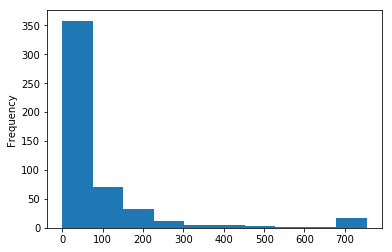

In [6]:
# Histograma dos erros
# Temos mais erros pequenos, ou seja, mais valoes proximos a média
hist_plot = squared_errors.plot('hist')

In [7]:
# Calculando o desvio padrão, usando a variavel exploratoria RM(media de quartos)
np.std(dataset["RM"])

0.7019225143345692

In [8]:
# Clacular a correlação e colocar na mesma escala usando pearsonr do SciPy
from scipy.stats.stats import pearsonr

In [9]:
pearsonr(dataset['RM'], dataset['target'])[0]

0.6953599470715393

In [10]:
# Plotar a correlação
x_range = [dataset['RM'].min(), dataset['RM'].max()]
y_range = [dataset['target'].min(), dataset['target'].max()]

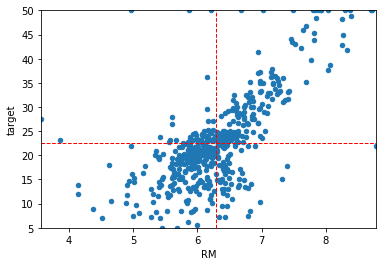

In [11]:
# Plot x e y com a media
scatter_plot = dataset.plot(kind='scatter', x='RM', y='target', xlim=x_range, ylim=y_range)

# Calculo da media
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(), dataset['target'].mean()], '--', color='red', linewidth=1)
meanX = scatter_plot.plot([dataset['RM'].mean(), dataset['RM'].mean()], y_range, '--', color='red', linewidth=1)

# Regressão Linear com StatsModels

In [12]:
import statsmodels.api as sm

In [13]:
Y = dataset['target']
X = dataset['RM']

In [14]:
# Add os valores do coeficiente a variavel X
X = sm.add_constant(X)

In [15]:
X.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [16]:
# Criando o modelo de regressão
modelo = sm.OLS(Y, X)

#Treina o modelo
modelo_v1 = modelo.fit()

In [17]:
print(modelo_v1.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 27 Apr 2020   Prob (F-statistic):           2.49e-74
Time:                        14:05:42   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

In [18]:
modelo_v1.params

const   -34.670621
RM        9.102109
dtype: float64

In [19]:
# Gerando os valores previstos
valores_previstos = modelo_v1.predict(X)
valores_previstos

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
5      23.855940
6      20.051258
7      21.507596
8      16.583355
9      19.978442
10     23.373528
11     20.023952
12     18.931699
13     19.477826
14     20.815836
15     18.431083
16     19.350396
17     19.851012
18     14.990486
19     17.457157
20     16.028126
21     19.623459
22     21.234533
23     18.239939
24     19.250273
25     16.292087
26     18.239939
27     20.369832
28     24.447577
29     26.076855
         ...    
476    24.347454
477    13.606965
478    21.625923
479    22.026416
480    22.144743
481    26.768615
482    29.599371
483    17.775731
484    18.767861
485    22.781891
486    20.979674
487    19.077333
488    14.972282
489    14.608197
490    11.686420
491    19.787297
492    19.787297
493    17.275115
494    19.268477
495    16.938337
496    14.389747
497    18.066999
498    20.114973
499    16.019024
500    20.187790
501    25.339584
502    21.034286
503    28.8256

In [20]:
# Fazendo previsoes com o modelo treinado
RM = 5
Xp = np.array([1, RM])
print('Se RM = %0.1f nosso modelo prevê que a mediana da taxa de ocupação é %0.1f' % (RM, modelo_v1.predict(Xp)))

Se RM = 5.0 nosso modelo prevê que a mediana da taxa de ocupação é 10.8


In [21]:
# Plotar a correlação
x_range = [dataset['RM'].min(), dataset['RM'].max()]
y_range = [dataset['target'].min(), dataset['target'].max()]

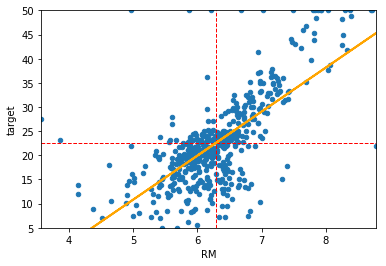

In [22]:
# Primeira camada: Plot x e y com a media
scatter_plot = dataset.plot(kind='scatter', x='RM', y='target', xlim=x_range, ylim=y_range)

# Segunda camada:  Calculo da media
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(), dataset['target'].mean()], '--', color='red', linewidth=1)
meanX = scatter_plot.plot([dataset['RM'].mean(), dataset['RM'].mean()], y_range, '--', color='red', linewidth=1)

# Terceira camada: Linha de regressão
regression_line = scatter_plot.plot(dataset['RM'], valores_previstos, '-', color='orange', linewidth=2)

# Regressão Linear com Scikit-Learn

In [23]:
from sklearn import linear_model

In [24]:
# Cria o objeto
modelo_v2 = linear_model.LinearRegression(normalize=False, fit_intercept=True)

In [26]:
# Definindo x e y
num_observ = len(dataset)

# X deve ser uma matriz
X = dataset['RM'].values.reshape(num_observ, 1)
Y = dataset['target'].values

In [27]:
# Treinando o modelo
modelo_v2.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
print(modelo_v2 .coef_)
print(modelo_v2 .intercept_)

[9.10210898]
-34.67062077643857


In [32]:
# Treinando o modelo
RM = 5
Xp = np.array(RM).reshape(-1, 1)

In [33]:
print(RM)
print(modelo_v2.predict(Xp))

5
[10.83992413]
